In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2024-09-12 19:43:48.134731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 19:43:48.154119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 19:43:48.159611: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 19:43:48.174524: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 19:43:49.146279: W tensorflow/compiler/tf2

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.
X_train = X_train.reshape([-1, 28, 28, 1])
X_valid = X_valid.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

In [9]:
X_train[333]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01176471],
        [0.        ],
        [0.16470588],
        [0.36078431],
        [0.27843137],
        [0.41960784],
        [0.12941176],
        [0.        ],
        [0.01176471],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00784314],
        [0.        ],
        [0.09019608],
        [0.56862745],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(60, activation = "relu", kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(60, activation = "relu", kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(60, activation = "relu", kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.01)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 5)
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid), callbacks = [lr_scheduler, early_stopping])

Epoch 1/30


2024-09-12 22:08:40.514720: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7384 - loss: 0.7334 - val_accuracy: 0.8268 - val_loss: 0.4907 - learning_rate: 0.0100
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8303 - loss: 0.4785 - val_accuracy: 0.8429 - val_loss: 0.4489 - learning_rate: 0.0100
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8351 - loss: 0.4606 - val_accuracy: 0.8498 - val_loss: 0.4377 - learning_rate: 0.0100
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8442 - loss: 0.4387 - val_accuracy: 0.8500 - val_loss: 0.4253 - learning_rate: 0.0100
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8513 - loss: 0.4246 - val_accuracy: 0.8524 - val_loss: 0.4249 - learning_rate: 0.0100
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8521 - loss: 0.4218 - val_accuracy: 0.8299 - val_loss: 0.4909 - learning_rate: 0.0100
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8515 - loss: 0.4246

In [11]:
# get model params

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 60)             │        47,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,032 (214.97 KB)

 Trainable params: 55,030 (214.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

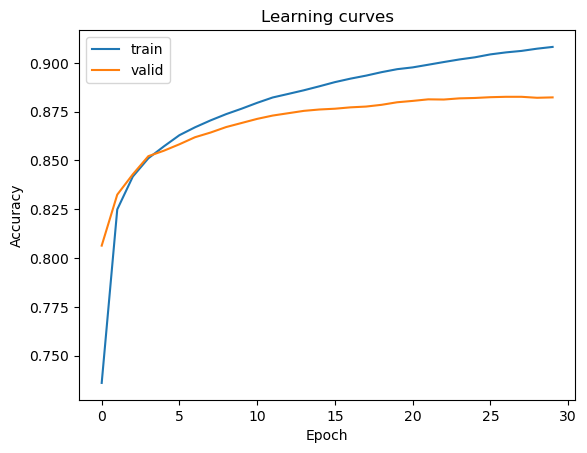

In [13]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [17]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test)))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9101 - loss: 0.2480
Loss + accuracy on train data: [0.2478470653295517, 0.9110400080680847]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8819 - loss: 0.3521
Loss + accuracy on test data: [0.35215237736701965, 0.8784999847412109]
